Loaded X shape for clustering: (303, 12)
Loaded y shape for clustering: (303,)

First 5 rows of X for clustering:
    thalach   oldpeak  thal_7.0  cp_4       age      chol  trestbps  exang_1  \
0  0.017197  1.087338         0     0  0.948726 -0.264900  0.757525        0   
1 -1.821905  0.397182         0     1  1.392002  0.760415  1.611220        1   
2 -0.902354  1.346147         1     1  1.392002 -0.342283 -0.665300        1   
3  1.637359  2.122573         0     0 -1.932564  0.063974 -0.096170        0   
4  0.980537  0.310912         0     0 -1.489288 -0.825922 -0.096170        0   

   slope_2  sex_1  ca_1.0  cp_3  
0        0      1       0     0  
1        1      1       0     0  
2        1      1       0     0  
3        0      1       0     1  
4        0      0       0     0  

--- Applying Elbow Method for K-Means ---


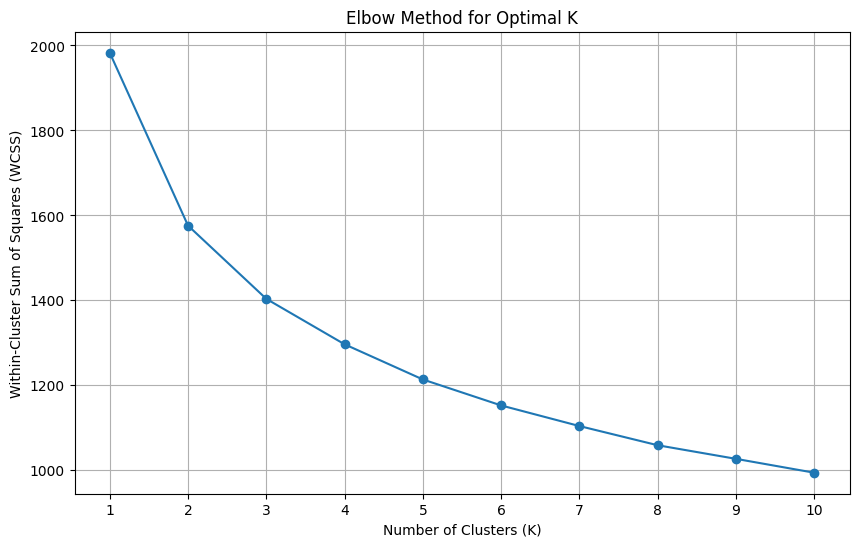


Chosen Optimal K for K-Means: 2

--- Applying K-Means Clustering with K=2 ---

First 5 rows of data with K-Means Clusters:
    thalach   oldpeak  thal_7.0  cp_4       age      chol  trestbps  exang_1  \
0  0.017197  1.087338         0     0  0.948726 -0.264900  0.757525        0   
1 -1.821905  0.397182         0     1  1.392002  0.760415  1.611220        1   
2 -0.902354  1.346147         1     1  1.392002 -0.342283 -0.665300        1   
3  1.637359  2.122573         0     0 -1.932564  0.063974 -0.096170        0   
4  0.980537  0.310912         0     0 -1.489288 -0.825922 -0.096170        0   

   slope_2  sex_1  ca_1.0  cp_3  KMeans_Cluster  Actual_Target  
0        0      1       0     0               1              0  
1        1      1       0     0               1              1  
2        1      1       0     0               1              1  
3        0      1       0     1               0              0  
4        0      0       0     0               0              0  
Silho

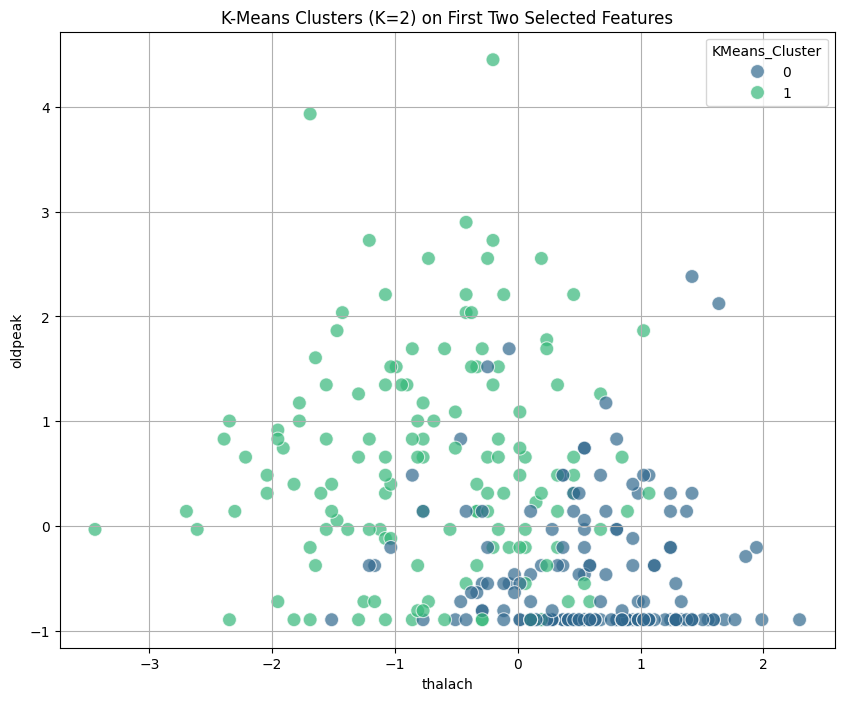


Visualizing Actual Target (using first two selected features)...


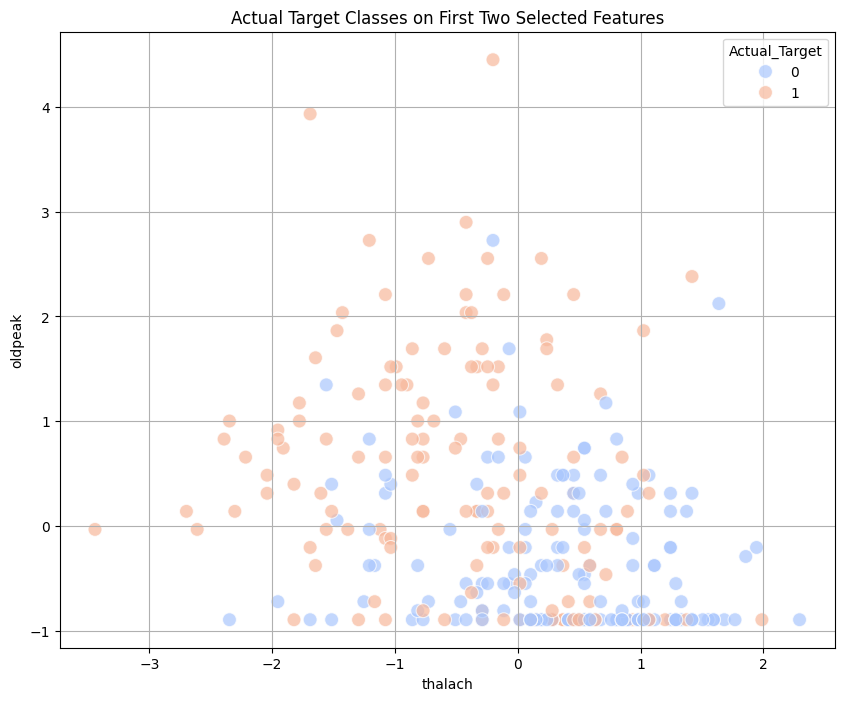

In [1]:
# 05_unsupervised_learning.ipynb

# 1. Apply K-Means Clustering (elbow method to determine K).

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Load the selected features (X_selected from 03_feature_selection.ipynb)
input_data_path = '../data/' # Relative path to data folder from notebooks folder
X = pd.read_csv(os.path.join(input_data_path, 'X_selected_features.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))

# Make sure y is a 1D array/Series if needed for comparisons (not directly for clustering)
y = y.iloc[:, 0]

print("Loaded X shape for clustering:", X.shape)
print("Loaded y shape for clustering:", y.shape)
print("\nFirst 5 rows of X for clustering:")
print(X.head())

# --- Elbow Method to determine Optimal K for K-Means ---
print("\n--- Applying Elbow Method for K-Means ---")

# A list to store the Within-Cluster Sum of Squares (WCSS)
wcss = []

# Range of K values to test
# It's common to test from 1 up to sqrt(N) or a reasonable small number (e.g., 1 to 10-15)
# Here, let's try from 1 to 10
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is important for robustness
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal K.
# Common choices for heart disease dataset are often K=2 (healthy vs. diseased)
# or K=3/4 if there are sub-groups. Let's aim for K=2 initially given our binary target.
optimal_k = 2 # Based on common understanding of dataset and primary goal (binary classification)
              # You will confirm this from the plot.

print(f"\nChosen Optimal K for K-Means: {optimal_k}")

# --- Apply K-Means Clustering with Optimal K ---
print(f"\n--- Applying K-Means Clustering with K={optimal_k} ---")
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X)

# Add cluster labels to the original (selected) data for comparison
X_clustered_kmeans = X.copy()
X_clustered_kmeans['KMeans_Cluster'] = kmeans_labels
X_clustered_kmeans['Actual_Target'] = y # Add actual target for comparison

print("\nFirst 5 rows of data with K-Means Clusters:")
print(X_clustered_kmeans.head())

# Evaluate K-Means (e.g., Silhouette Score, but primarily qualitative for clustering)
# Silhouette Score requires at least 2 clusters
if optimal_k > 1:
    silhouette_avg = silhouette_score(X, kmeans_labels)
    print(f"Silhouette Score for K-Means (K={optimal_k}): {silhouette_avg:.4f}")

# Visualize K-Means clusters (using first two principal components for 2D visualization if possible)
# For better visualization, we might need to reduce dimensions to 2 first (e.g., using PCA again)
# or pick two features. For now, let's plot on the first two selected features if we have enough.
if X.shape[1] >= 2:
    print("\nVisualizing K-Means Clusters (using first two selected features)...")
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='KMeans_Cluster', data=X_clustered_kmeans,
                    palette='viridis', s=100, alpha=0.7)
    plt.title(f'K-Means Clusters (K={optimal_k}) on First Two Selected Features')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.grid(True)
    plt.show()

    # Also compare with actual target
    print("\nVisualizing Actual Target (using first two selected features)...")
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='Actual_Target', data=X_clustered_kmeans,
                    palette='coolwarm', s=100, alpha=0.7)
    plt.title('Actual Target Classes on First Two Selected Features')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.grid(True)
    plt.show()

# Store K-Means results (labels and model)
unsupervised_results = {'K-Means_Labels': kmeans_labels, 'K-Means_Model': kmeans_model}


--- Performing Hierarchical Clustering ---


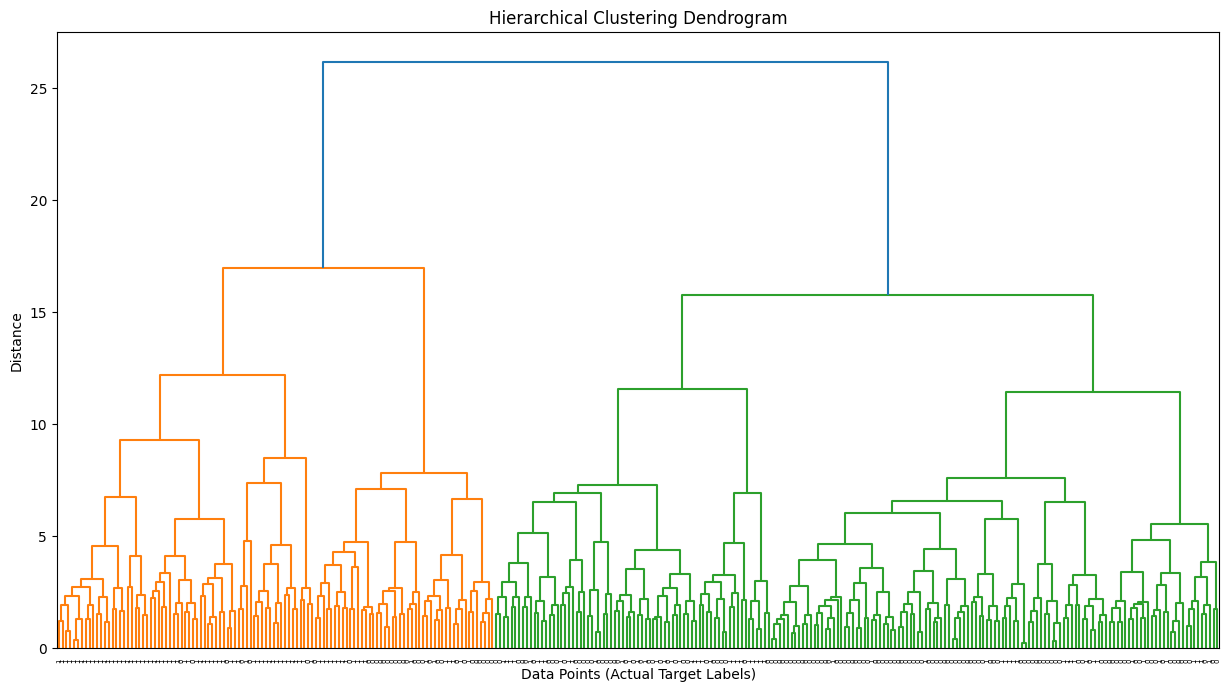


First 5 rows of data with Hierarchical Clusters (K=2):
    thalach   oldpeak  thal_7.0  cp_4       age      chol  trestbps  exang_1  \
0  0.017197  1.087338         0     0  0.948726 -0.264900  0.757525        0   
1 -1.821905  0.397182         0     1  1.392002  0.760415  1.611220        1   
2 -0.902354  1.346147         1     1  1.392002 -0.342283 -0.665300        1   
3  1.637359  2.122573         0     0 -1.932564  0.063974 -0.096170        0   
4  0.980537  0.310912         0     0 -1.489288 -0.825922 -0.096170        0   

   slope_2  sex_1  ca_1.0  cp_3  Hierarchical_Cluster  Actual_Target  
0        0      1       0     0                     2              0  
1        1      1       0     0                     2              1  
2        1      1       0     0                     2              1  
3        0      1       0     1                     1              0  
4        0      0       0     0                     1              0  

--- Comparing K-Means and Hierarchic

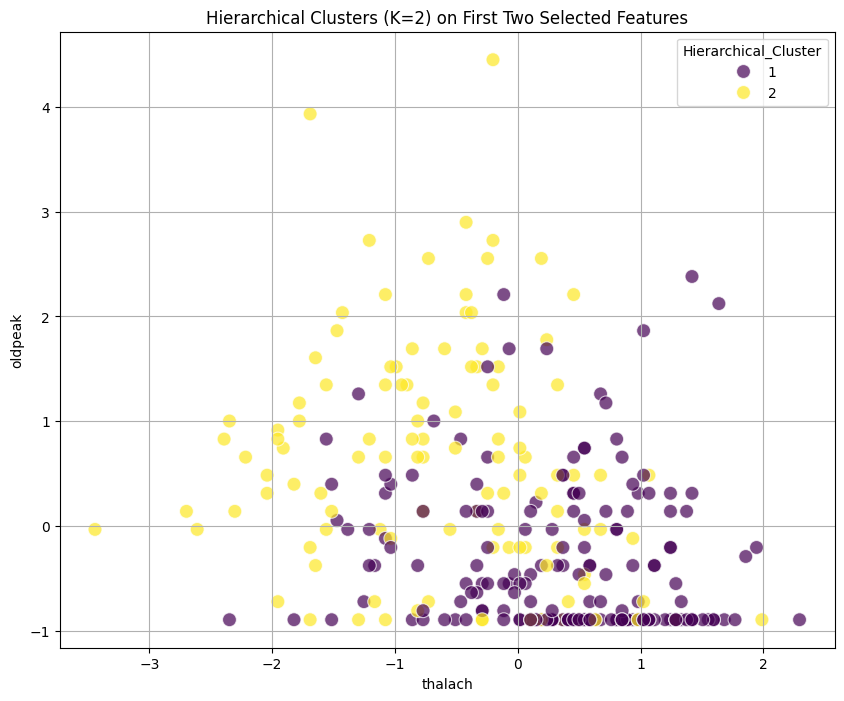

In [2]:
# Continue 05_unsupervised_learning.ipynb

# 2. Perform Hierarchical Clustering (dendrogram analysis).
# 3. Compare clusters with actual disease labels.

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print("\n--- Performing Hierarchical Clustering ---")

# Generate the linkage matrix
# 'ward' method minimizes the variance within each cluster
# This method is generally recommended for hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           labels=y.values, # Use actual target labels for comparison
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points (Actual Target Labels)')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, choose the number of clusters.
# A horizontal line cutting through the tallest vertical lines would indicate clusters.
# For K=2, we can cut the dendrogram to get 2 clusters.
# You can visually inspect to determine where to cut for a desired number of clusters.
# For instance, if aiming for 2 clusters, look for the longest vertical line before any horizontal split.
# Let's target 2 clusters, similar to K-Means, for comparison.
hierarchical_n_clusters = 2 # Based on visual inspection for two main branches

# Extract cluster labels from the dendrogram
hierarchical_labels = fcluster(linked, hierarchical_n_clusters, criterion='maxclust')

# Add hierarchical cluster labels to the original (selected) data for comparison
X_clustered_hierarchical = X.copy()
X_clustered_hierarchical['Hierarchical_Cluster'] = hierarchical_labels
X_clustered_hierarchical['Actual_Target'] = y # Already added, but for clarity

print(f"\nFirst 5 rows of data with Hierarchical Clusters (K={hierarchical_n_clusters}):")
print(X_clustered_hierarchical.head())

# --- Compare Clusters with Actual Disease Labels ---
print("\n--- Comparing K-Means and Hierarchical Clusters with Actual Target Labels ---")

# Since cluster labels from algorithms might be different (e.g., 0/1 vs 1/2),
# we use adjusted_rand_score and normalized_mutual_info_score for comparison.
# These metrics measure the similarity between two clusterings, ignoring permutations.

# Compare K-Means labels with actual target labels
# Note: K-Means labels might be inverted compared to actual target (0 vs 1).
# adjusted_rand_score and normalized_mutual_info_score handle this.
kmeans_adj_rand_score = adjusted_rand_score(y, kmeans_labels)
kmeans_nmi_score = normalized_mutual_info_score(y, kmeans_labels)

print(f"K-Means vs Actual Target: Adjusted Rand Score = {kmeans_adj_rand_score:.4f}")
print(f"K-Means vs Actual Target: Normalized Mutual Information Score = {kmeans_nmi_score:.4f}")

# Compare Hierarchical labels with actual target labels
hierarchical_adj_rand_score = adjusted_rand_score(y, hierarchical_labels)
hierarchical_nmi_score = normalized_mutual_info_score(y, hierarchical_labels)

print(f"Hierarchical vs Actual Target: Adjusted Rand Score = {hierarchical_adj_rand_score:.4f}")
print(f"Hierarchical vs Actual Target: Normalized Mutual Information Score = {hierarchical_nmi_score:.4f}")

# Visualize Hierarchical Clusters (using first two selected features)
# Note: For better visualization, PCA to 2 components might be needed if the selected features
# don't provide clear separation or meaning on their own.
if X.shape[1] >= 2:
    print(f"\nVisualizing Hierarchical Clusters (K={hierarchical_n_clusters}) on First Two Selected Features...")
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='Hierarchical_Cluster', data=X_clustered_hierarchical,
                    palette='viridis', s=100, alpha=0.7)
    plt.title(f'Hierarchical Clusters (K={hierarchical_n_clusters}) on First Two Selected Features')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.grid(True)
    plt.show()

# Store Hierarchical results (labels)
unsupervised_results['Hierarchical_Labels'] = hierarchical_labels